<a href="https://colab.research.google.com/github/koteshvarma2/Data_Science/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully!
Shape of Dataset: (99, 9)

First 5 Rows:
    Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        22          0   
4           28         54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  

 Checking for Missing Values in Each Column:
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: in

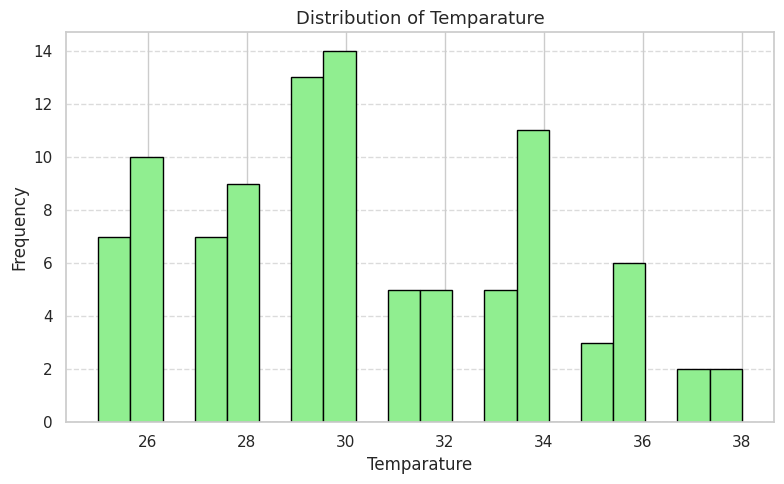

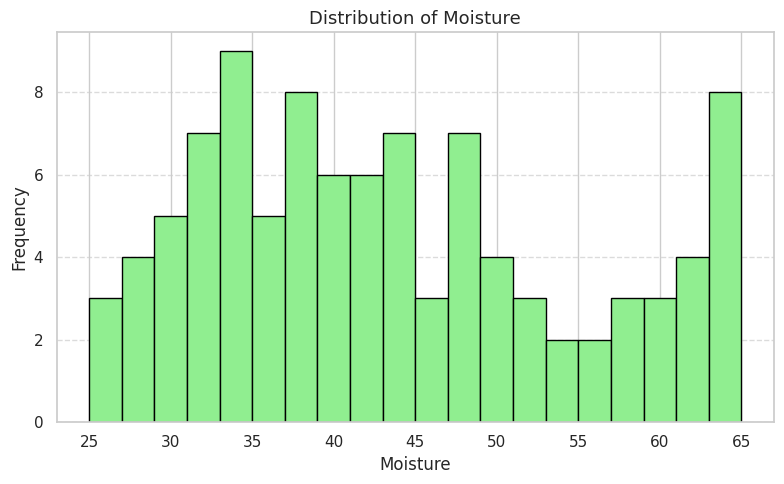

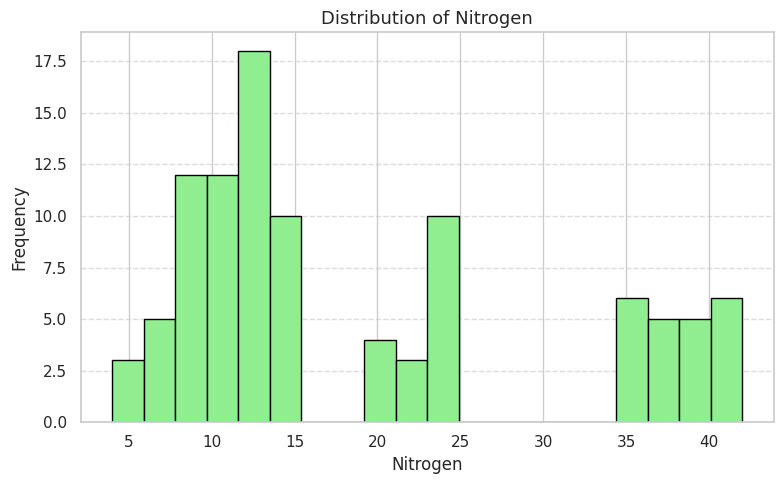

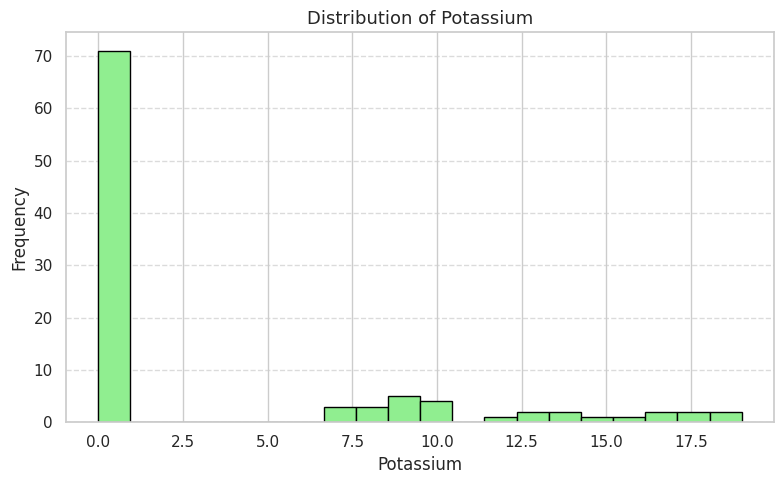

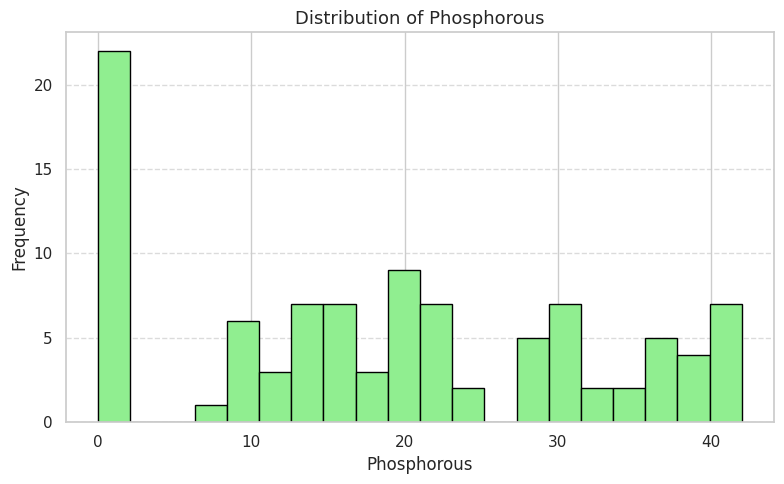

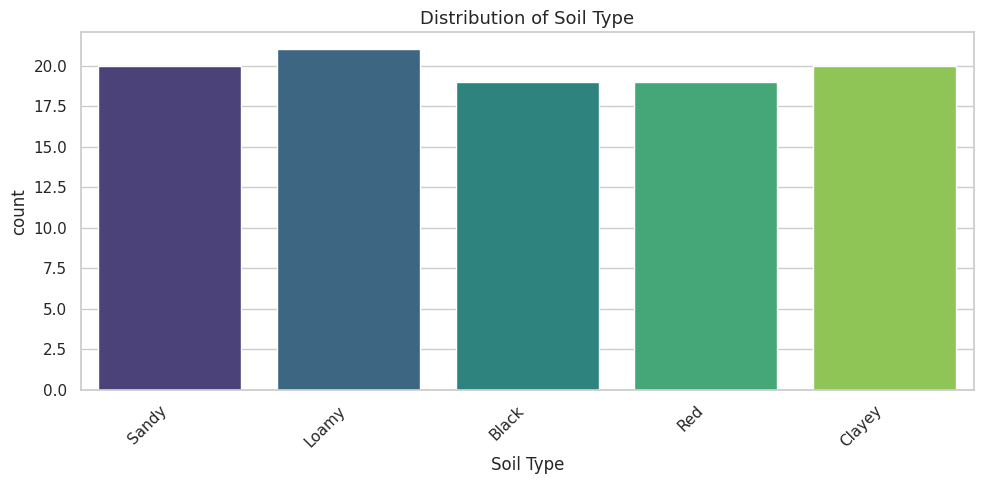

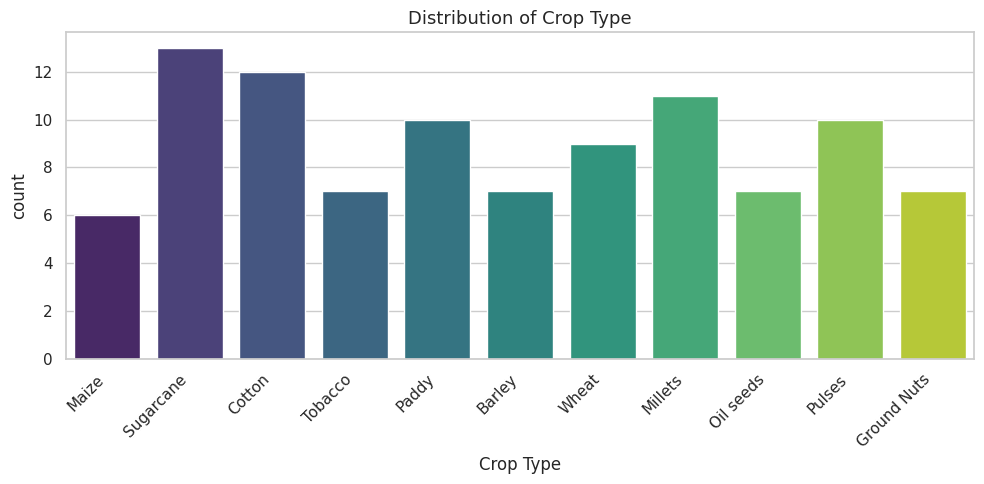

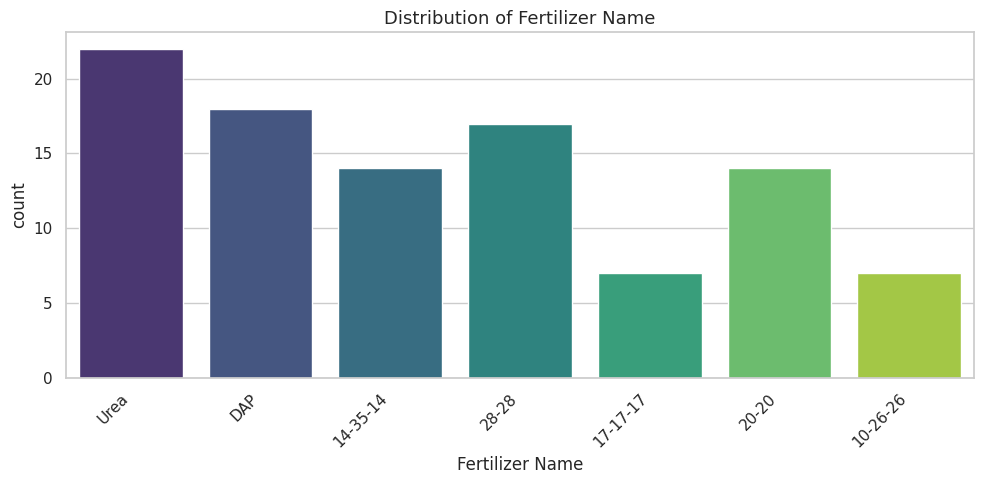

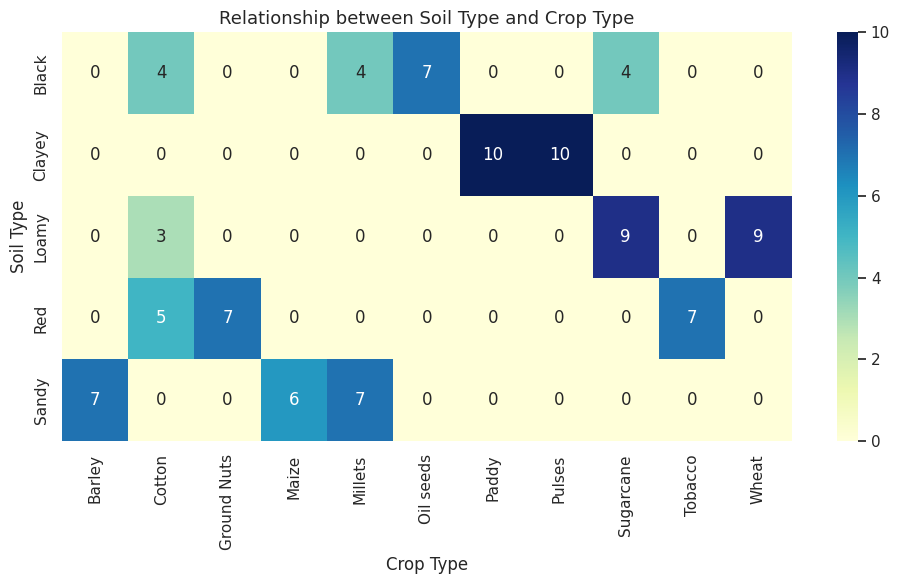

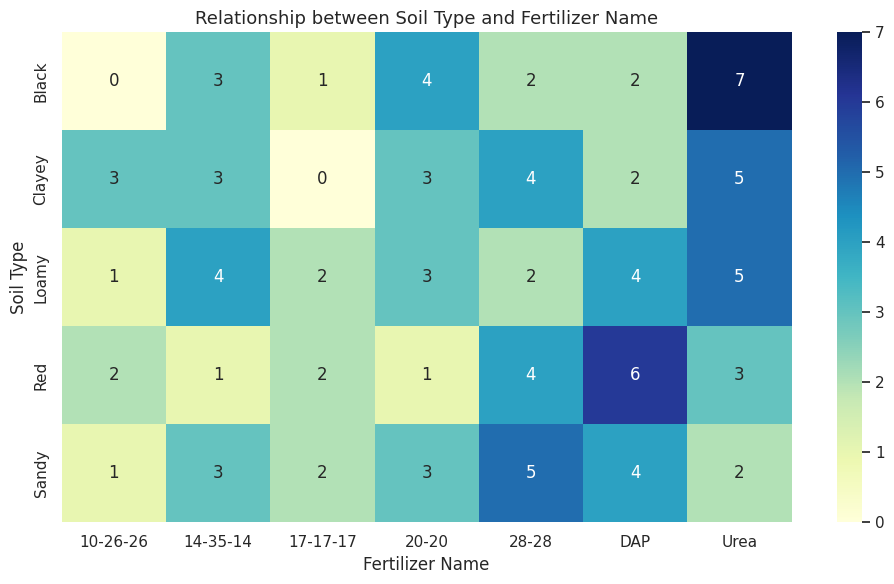

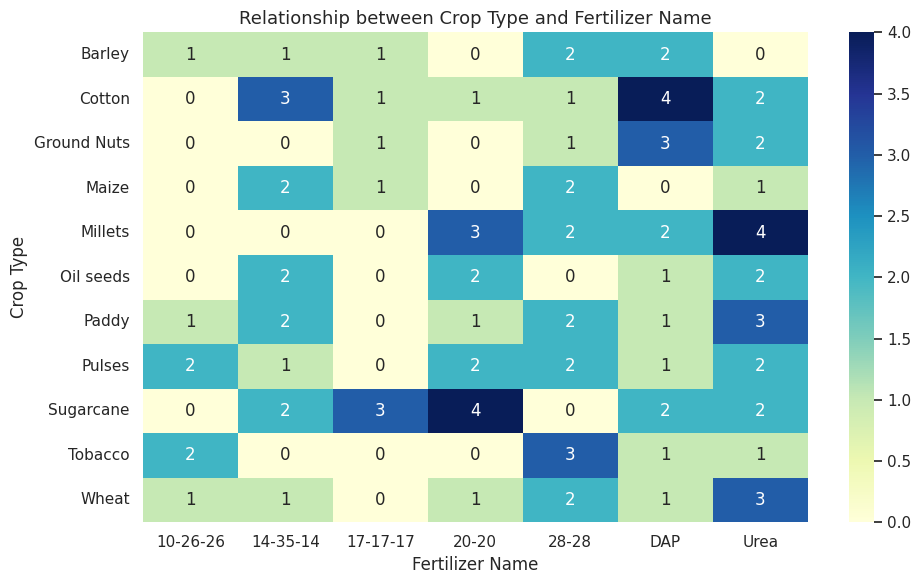

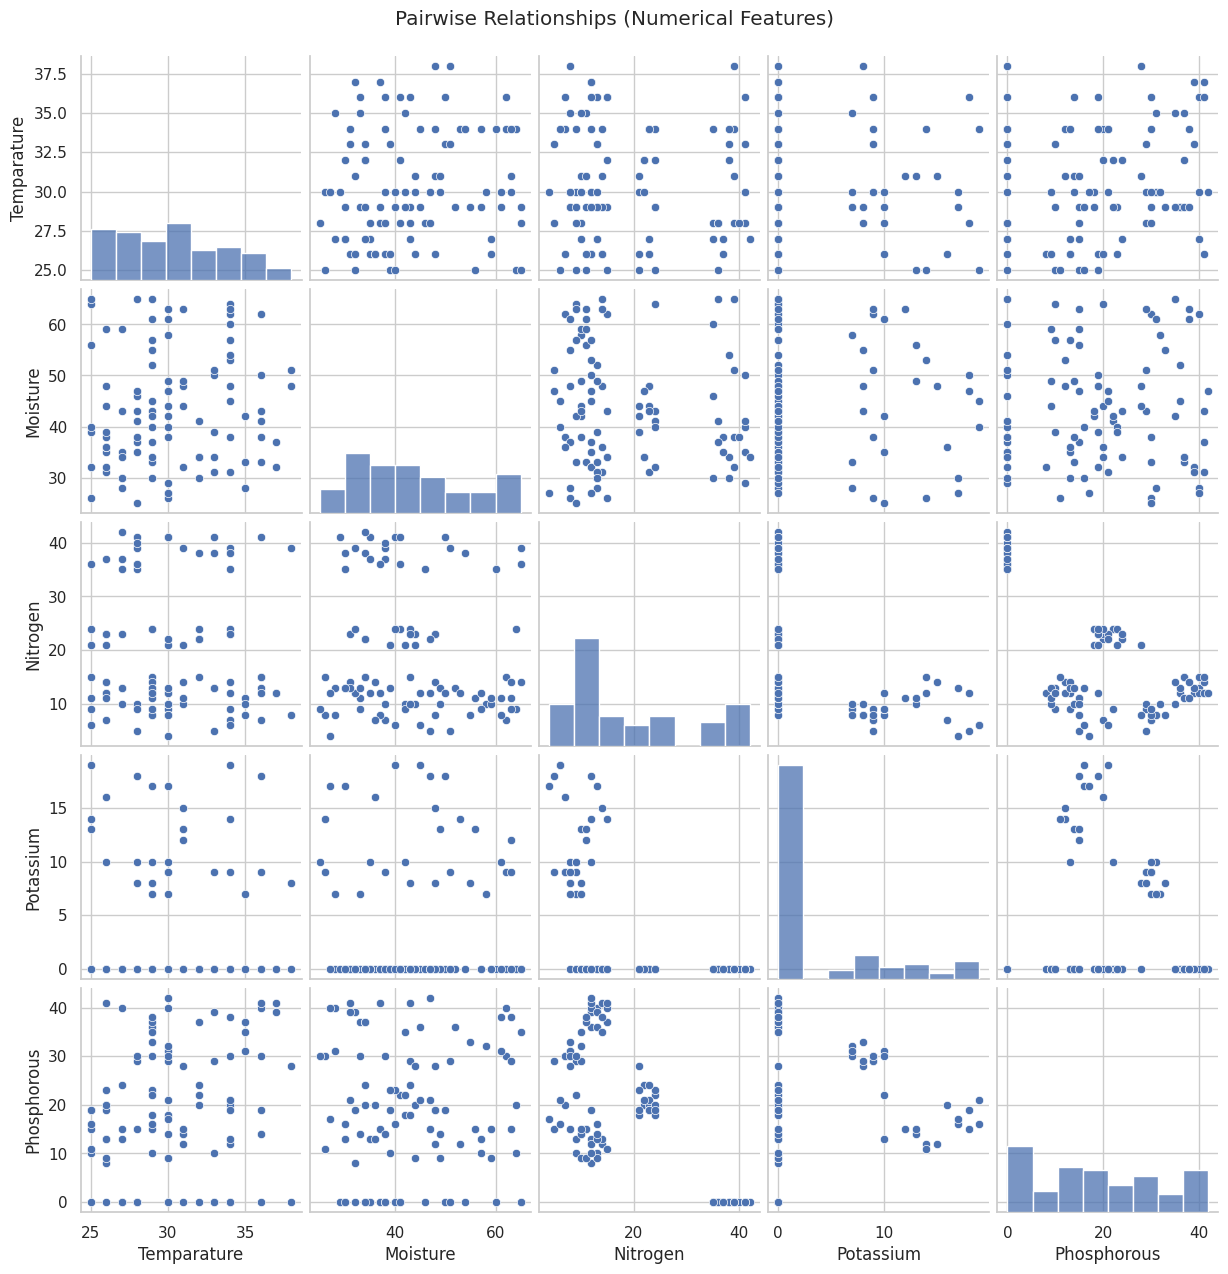

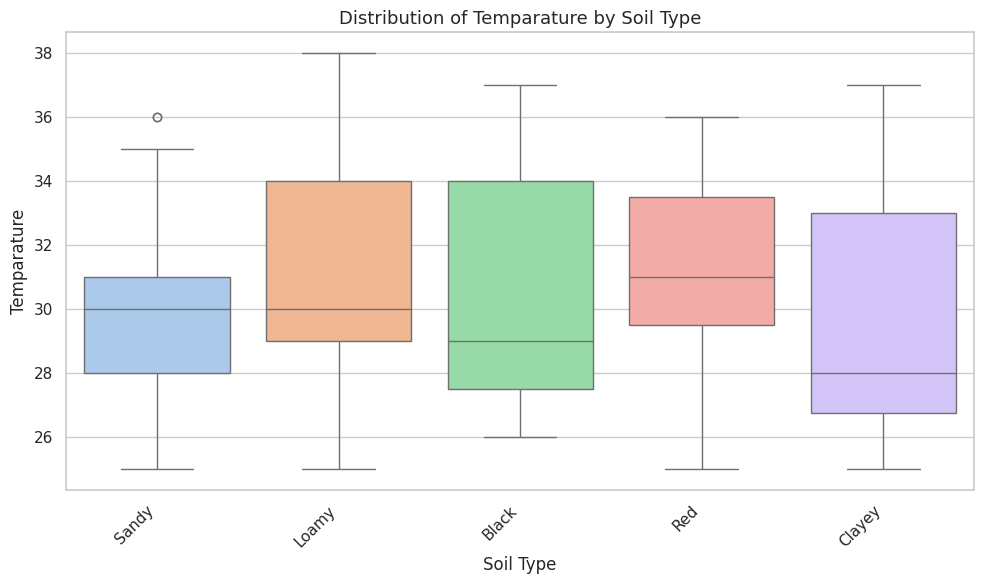

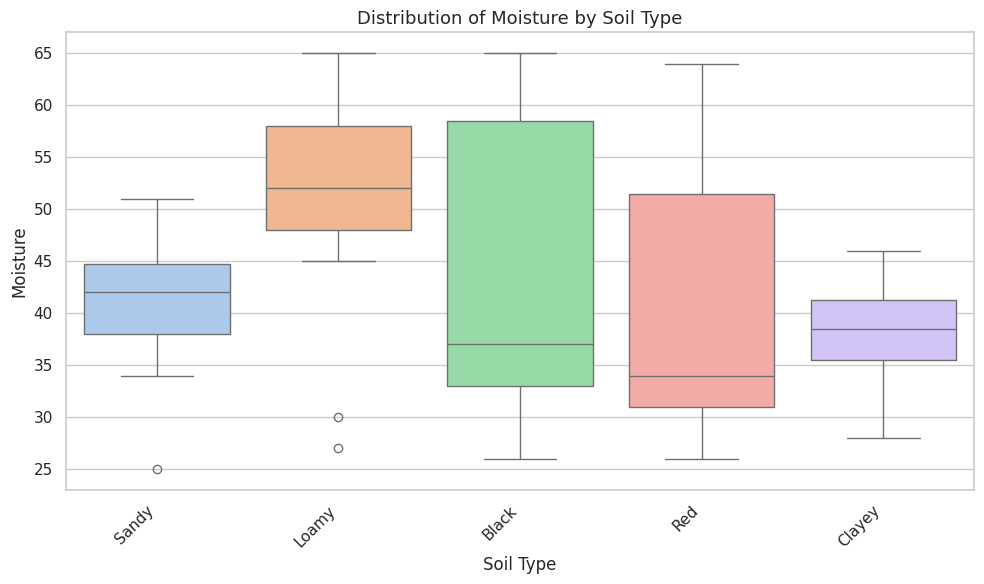

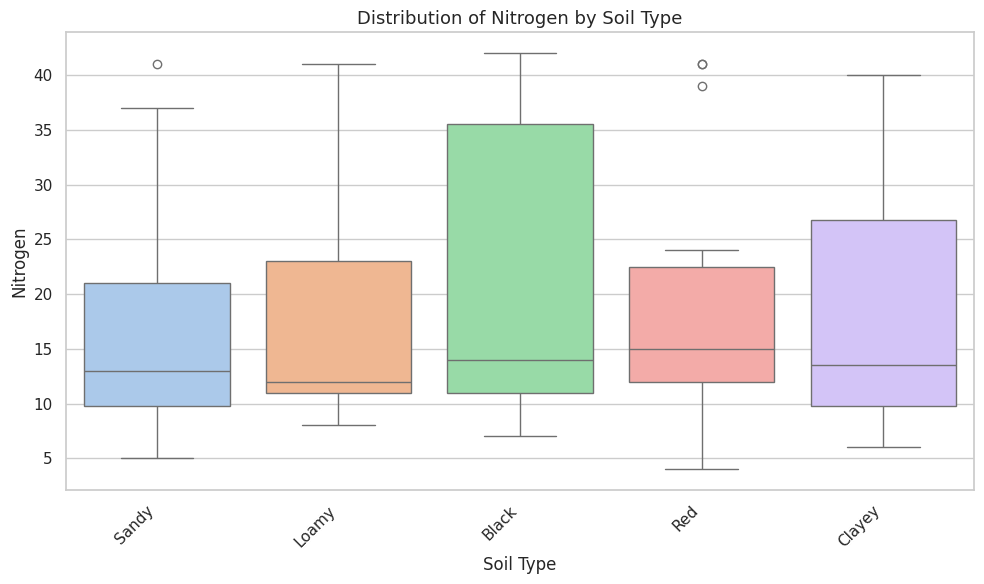

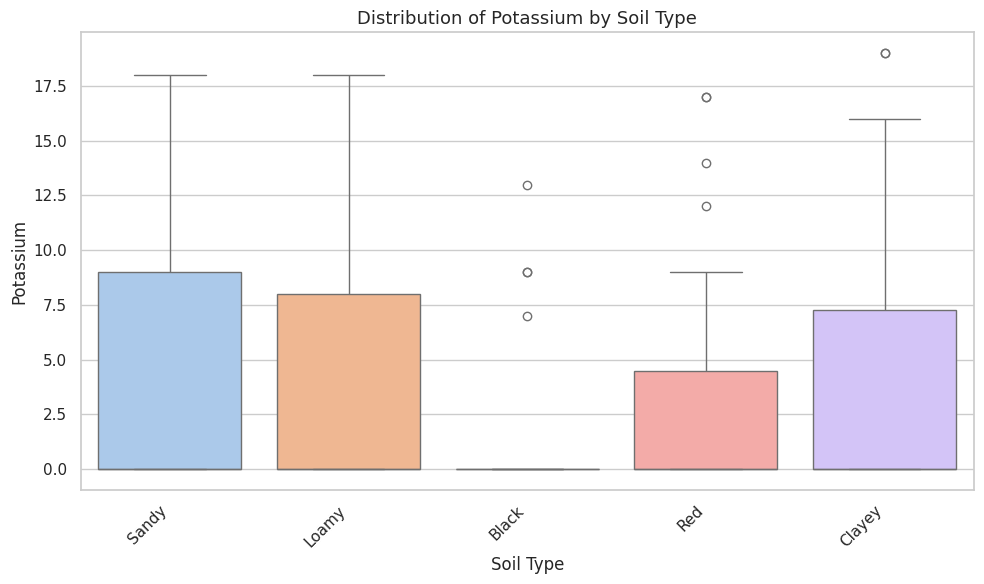

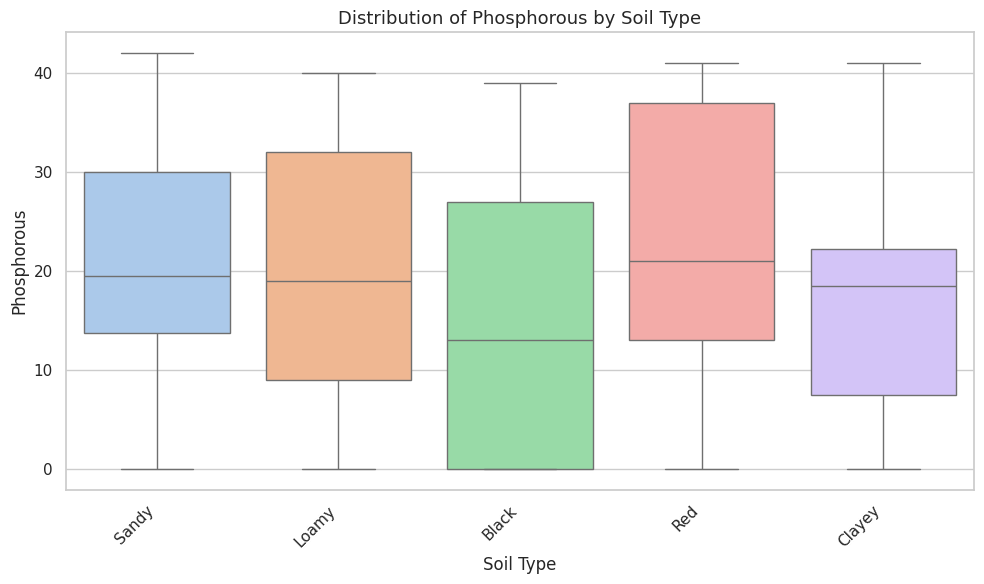

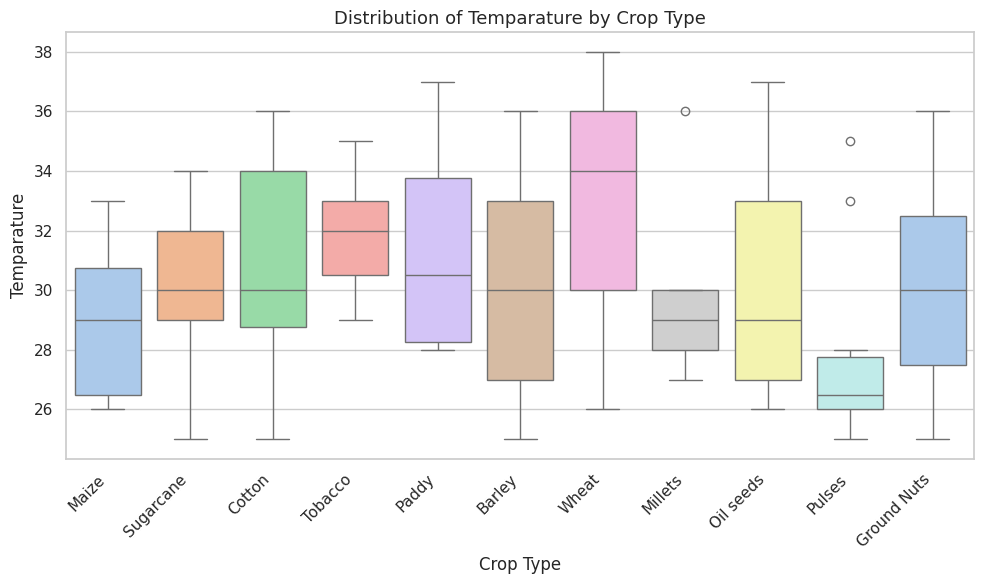

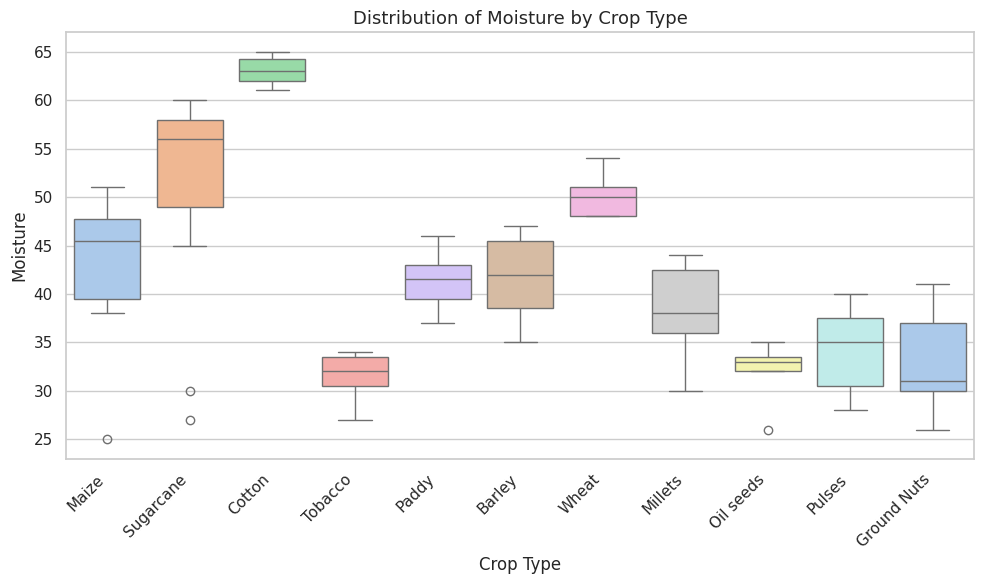

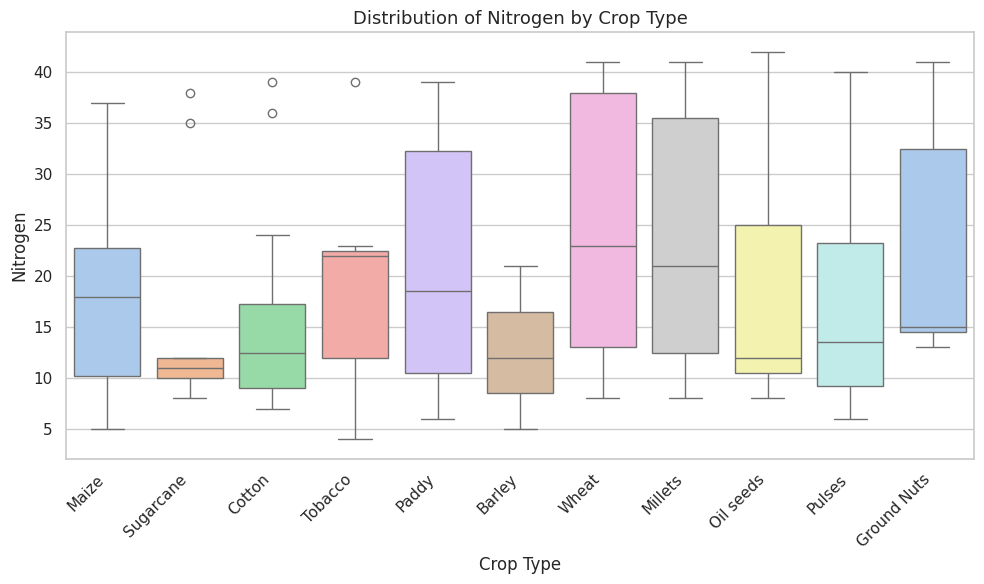

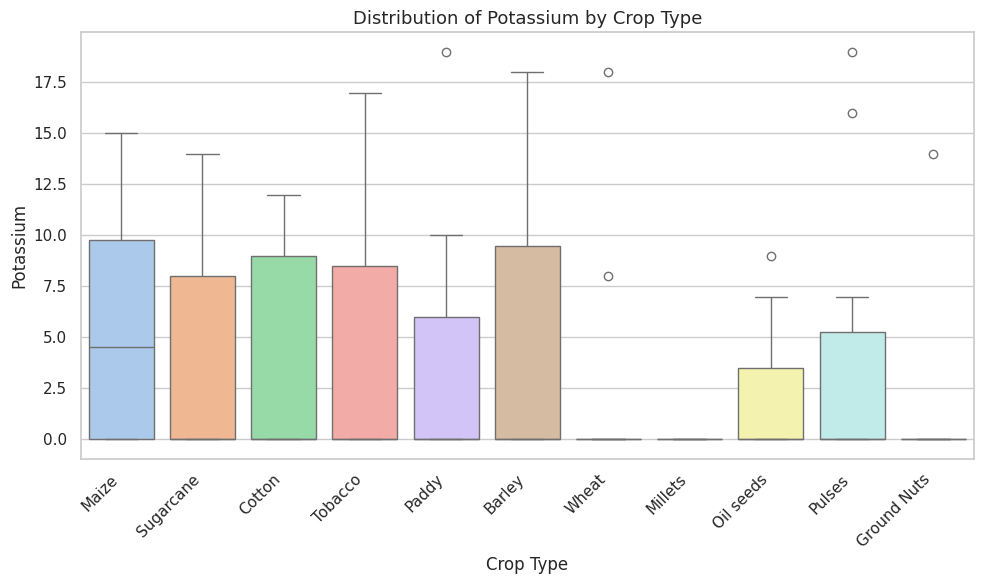

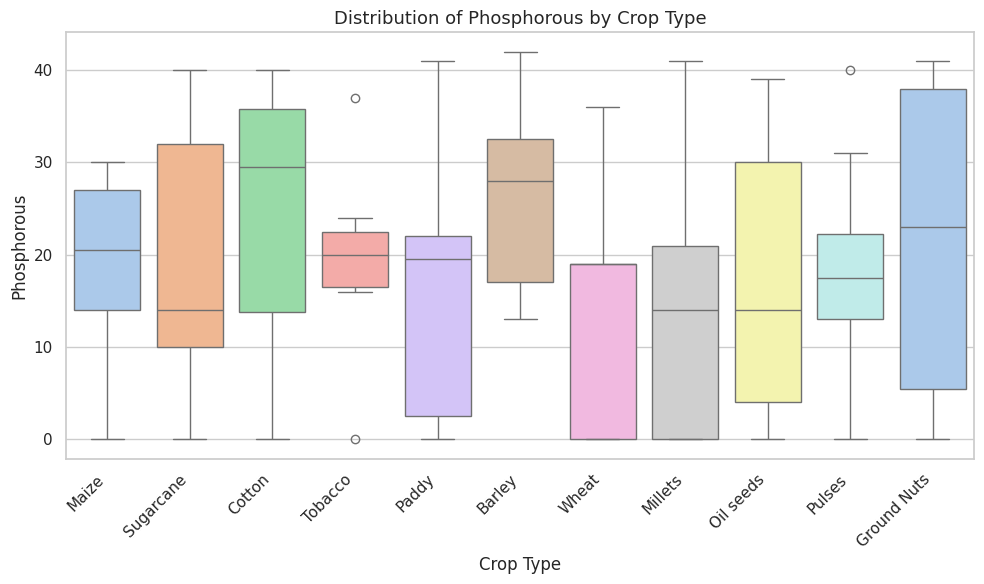

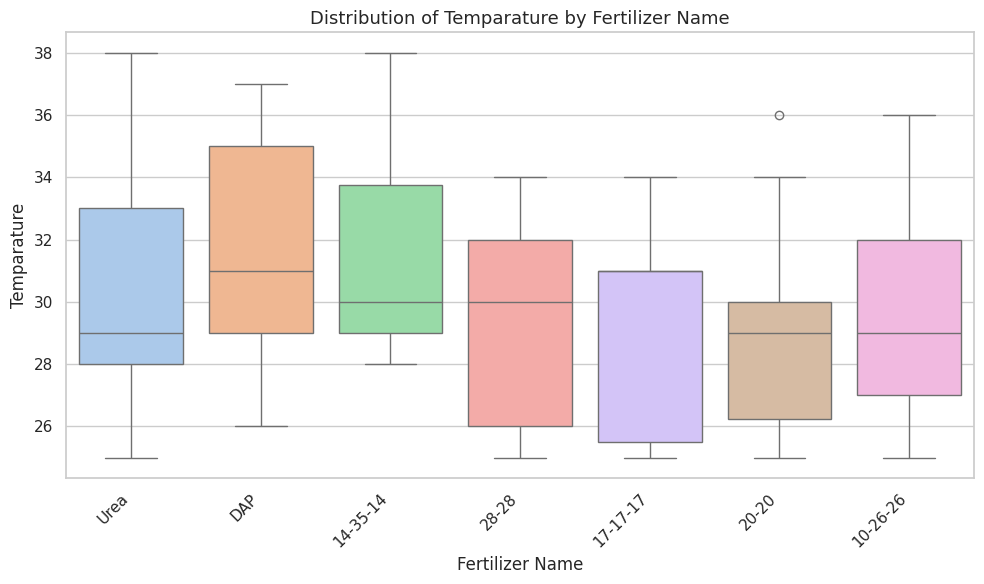

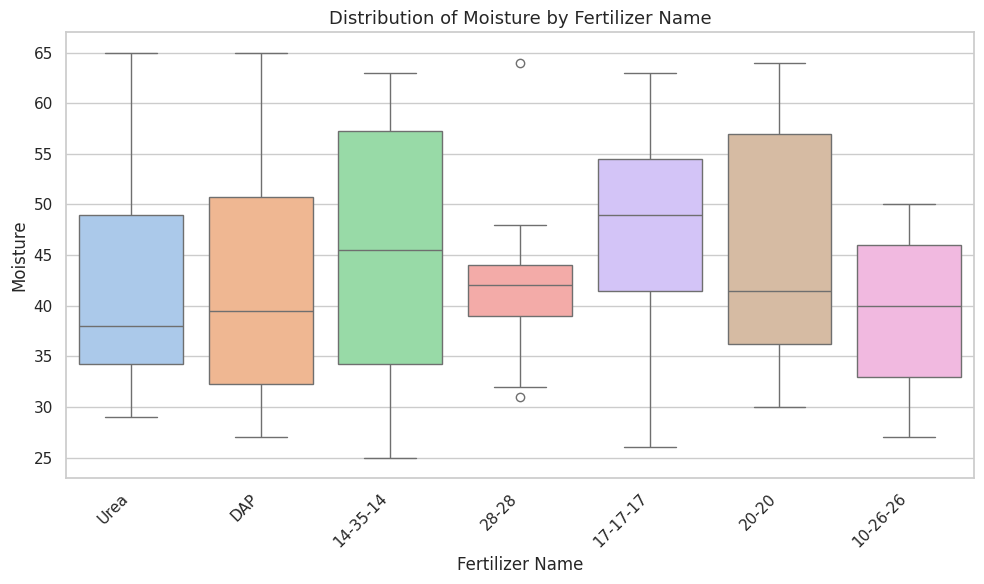

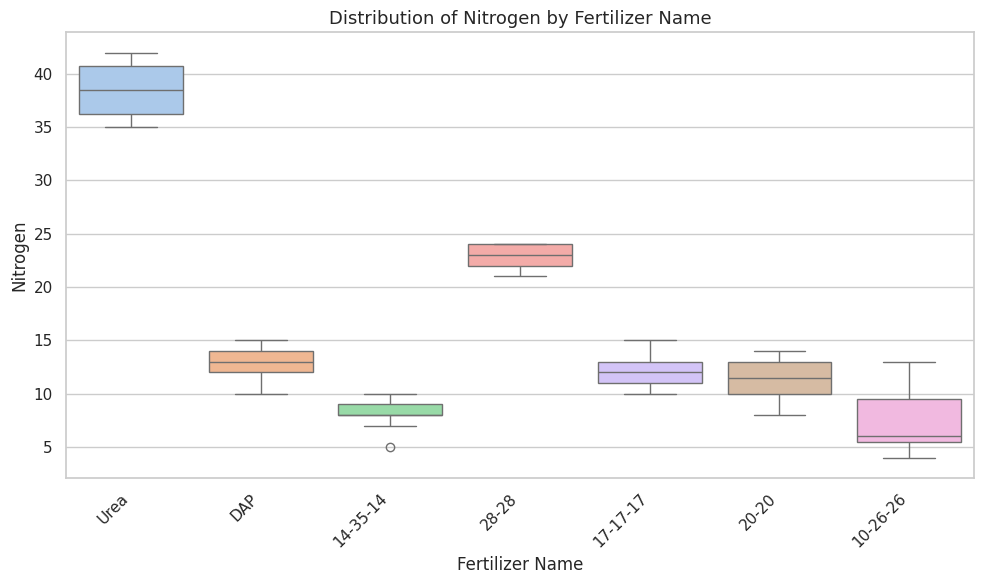

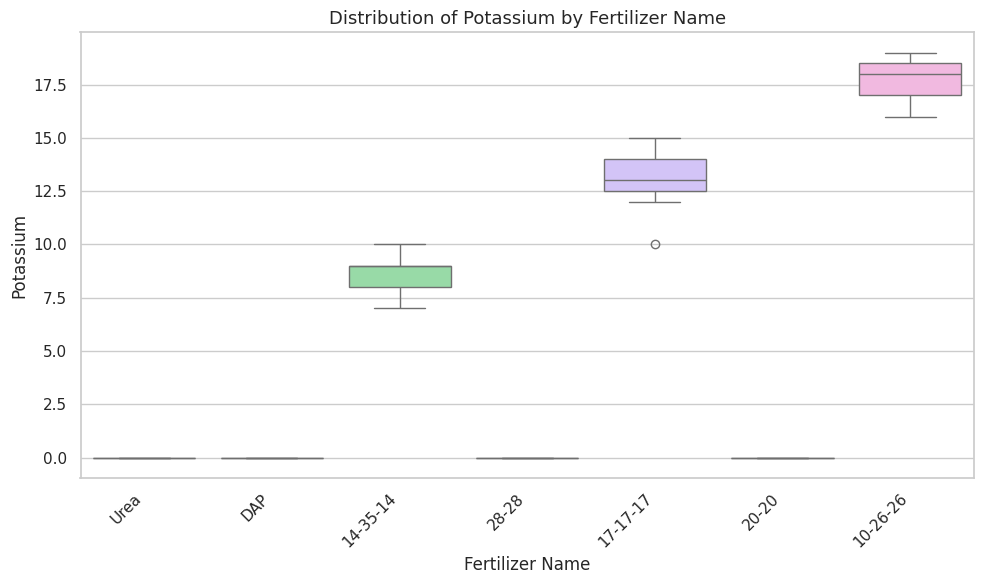

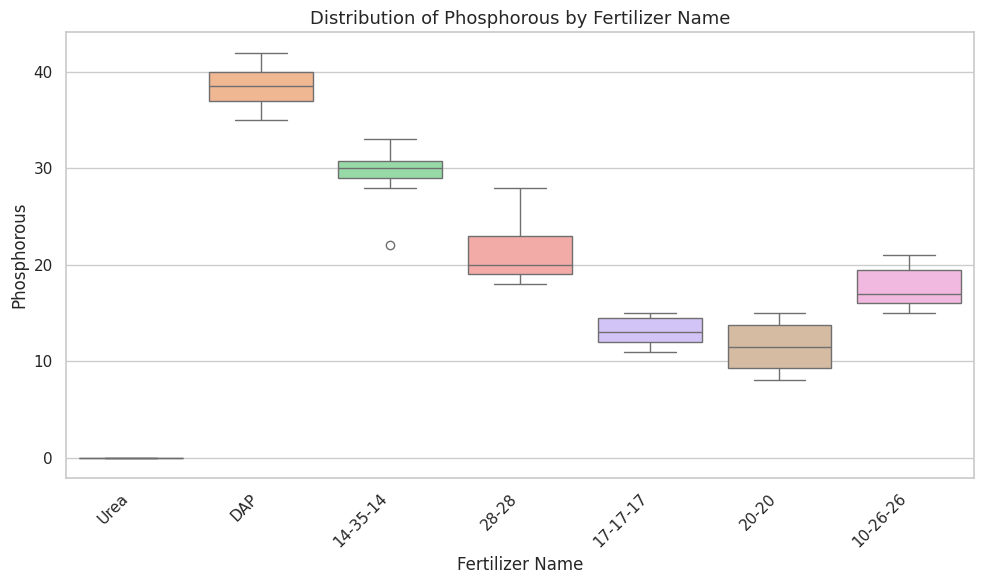

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://huggingface.co/spaces/Aakarsh007/FertilizerRecommendor/raw/main/Fertilizer%20Prediction.csv"
df = pd.read_csv(url, delimiter=',')

print("Dataset Loaded Successfully!")
print("Shape of Dataset:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

print("\n Checking for Missing Values in Each Column:")
print(df.isnull().sum())

missing_summary = df.isnull().sum().to_frame(name="Missing Values")
missing_summary["% Missing"] = (missing_summary["Missing Values"] / len(df)) * 100
missing_summary = missing_summary[missing_summary["Missing Values"] > 0]

if not missing_summary.empty:
    print("\n Summary of Columns with Missing Values:\n")
    print(missing_summary)
else:
    print("\n No missing values found in this dataset!")

if not missing_summary.empty:
    plt.figure(figsize=(10, 4))
    sns.heatmap(df[missing_summary.index].isnull(),
                cmap="coolwarm",
                cbar=False,
                linewidths=0.5,
                linecolor="gray")
    plt.title("Missing Values Heatmap (Paddy Fertilization Dataset)", fontsize=14)
    plt.xlabel("Columns with Missing Data")
    plt.ylabel("Data Rows")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    missing_summary["% Missing"].plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Percentage of Missing Values per Column", fontsize=13)
    plt.ylabel("% Missing")
    plt.xlabel("Columns")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


numerical_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        plt.hist(df[col], bins=20, color="lightgreen", edgecolor="black")
        plt.title(f'Distribution of {col}', fontsize=13)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


categorical_cols = ['Soil Type', 'Crop Type', 'Fertilizer Name']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, hue=col, palette="viridis", legend=False)
        plt.title(f'Distribution of {col}', fontsize=13)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1, col2 = categorical_cols[i], categorical_cols[j]
        if col1 in df.columns and col2 in df.columns:
            crosstab = pd.crosstab(df[col1], df[col2])
            plt.figure(figsize=(10, 6))
            sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
            plt.title(f'Relationship between {col1} and {col2}', fontsize=13)
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.tight_layout()
            plt.show()


valid_numerical_cols = [col for col in numerical_cols if col in df.columns]
if valid_numerical_cols:
    sns.pairplot(df[valid_numerical_cols])
    plt.suptitle("Pairwise Relationships (Numerical Features)", y=1.02)
    plt.show()


for cat_col in categorical_cols:
    for num_col in valid_numerical_cols:
        if cat_col in df.columns and num_col in df.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=cat_col, y=num_col, hue=cat_col, palette="pastel", legend=False)
            plt.title(f'Distribution of {num_col} by {cat_col}', fontsize=13)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()